In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

import pyMELTScalc as M

sys.path.append(r'H:\My Drive\2022\GitHub\pyMELTScalc\MELTS')

import time
import random

In [2]:
comp = {'SiO2_Liq': 76.51,
       'TiO2_Liq': 0.09,
       'Al2O3_Liq': 12.23,
       'FeOt_Liq': 0.97,
       'MgO_Liq': 0.06,
       'CaO_Liq': 0.81,
       'Na2O_Liq': 4.32,
       'K2O_Liq': 4.78,
       'H2O_Liq': 5.40,
       'CO2_Liq': 0.05,
        'MnO_Liq': 0.0,
        'P2O5_Liq': 0.0,
        'Cr2O3_Liq': 0.0,
       'Fe3Fet_Liq': 0.05}

In [5]:
Start = time.time()
P_bar = np.linspace(250, 5000, 32)
phases = ['quartz1', 'plagioclase1', 'k-feldspar1']
Results = M.findSaturationPressure(comp = comp, 
                                   Model = "MELTSv1.1.0",
                                   phases = phases,
                                   P_bar = P_bar, 
                                   T_initial_C = 900,
                                   dt_C = 50, 
                                   T_step_C = 1, 
                                   T_cut_C = 10,
                                   find_min = True,
                                   fO2_buffer = "NNO",
                                   fO2_offset = -2)
print(time.time() - Start)

120.826815366745


(<Figure size 500x400 with 1 Axes>,
 <AxesSubplot:xlabel='P (bars)', ylabel='T ($\\degree$C)'>)

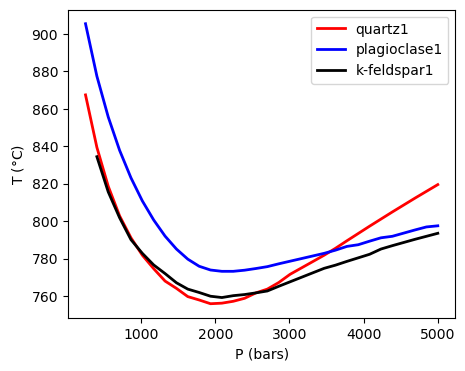

In [6]:
M.plot_surfaces(Results = Results, P_bar = P_bar, phases = phases)

In [7]:
# test sample in Gualda and Ghioro, 2014
comp = {'SiO2_Liq': 77.28,
       'TiO2_Liq': 0.00,
       'Al2O3_Liq': 12.62,
       'FeOt_Liq': 0.7,
       'MgO_Liq': 0.02,
       'CaO_Liq': 0.45,
       'Na2O_Liq': 3.87,
       'K2O_Liq': 4.99,
       'H2O_Liq': 6.5,
       'CO2_Liq': 0.0,
        'MnO_Liq': 0.0,
        'P2O5_Liq': 0.0,
        'Cr2O3_Liq': 0.0,
       'Fe3Fet_Liq': 0.05}

P_bar = np.linspace(50, 5000, 101)
phases = ['quartz1', 'plagioclase1', 'k-feldspar1']
Results = M.findSaturationPressure(comp = comp, 
                                   Model = "MELTSv1.1.0",
                                   phases = phases,
                                   P_bar = P_bar, 
                                   T_initial_C = 900,
                                   dt_C = 50, 
                                   T_step_C = 1, 
                                   T_cut_C = 10,
                                   find_min = True,
                                  fO2_buffer = "NNO",
                                  fO2_offset = 0.0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


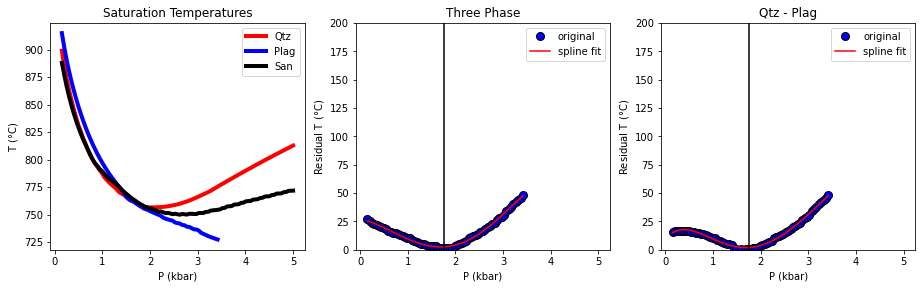

In [12]:
f, a = plt.subplots(1,3, figsize = (13,4), sharex = True)
f.tight_layout(pad = 2.0)

a[0].set_title('Saturation Temperatures')
a[0].set_xlabel('P (kbar)')
a[0].set_ylabel('T ($\degree$C)')
a[0].plot(P_bar/1000, Results['a_sat'][0,0,:], '-r', linewidth = 4, label = 'Qtz')
a[0].plot(P_bar/1000, Results['b_sat'][0,0,:], '-b', linewidth = 4, label = 'Plag')
a[0].plot(P_bar/1000, Results['c_sat'][0,0,:], '-k', linewidth = 4, label = 'San')
a[0].legend()

a[1].set_title('Three Phase')
a[1].set_xlabel('P (kbar)')
a[1].set_ylabel('Residual T ($\degree$C)')
a[1].plot(P_bar/1000, Results['Res_abc'][0,0,:], 'ok', markerfacecolor="b", label="original", markersize = 8)
a[1].plot(Results['CurveMin']['Res_abc']['P_new']/1000, Results['CurveMin']['Res_abc']['y_new'],
            '-', c="r", label="spline fit")
a[1].legend()
a[1].plot([1.75,1.75],[0,200], '-k')
a[1].set_ylim([0,200])

a[2].set_title('Qtz - Plag')
a[2].set_xlabel('P (kbar)')
a[2].set_ylabel('Residual T ($\degree$C)')
a[2].plot(P_bar/1000, Results['Res_ab'][0,0,:], 'ok', markerfacecolor="b", label="original", markersize = 8)
a[2].plot(Results['CurveMin']['Res_ab']['P_new']/1000, Results['CurveMin']['Res_ab']['y_new'],
            '-', c="r", label="spline fit")
a[2].legend()
a[2].plot([1.75,1.75],[0,200], '-k')
a[2].set_ylim([0,200])
plt.savefig("Q2F_figures/Gualda2014_example_120.eps", dpi = 300, bbox_inches='tight')

In [5]:
H2O_Liq = np.linspace(0.25, 6, 15)
Results = M.findSaturationPressure(comp = comp, 
                                   Model = "MELTSv1.1.0", 
                                   cores = 20,
                                   phases = phases,
                                   P_bar = P_bar, 
                                   T_initial_C = 900,
                                   dt_C = 50, 
                                   T_step_C = 1, 
                                   T_cut_C = 10,
                                   H2O_Liq = H2O_Liq,
                                   find_min = True)

IllegalArgumentException: CGAlgorithmsDD::orientationIndex encountered NaN/Inf numbers


ValueError: No Shapely geometry can be created from null value

In [ ]:
Results['CurveMin']

In [8]:
%matplotlib
M.residualT_plot(Results = Results, P_bar = P_bar, phases = phases, H2O_Liq = H2O_Liq)


Using matplotlib backend: Qt5Agg
